1. 一维梯度下降
连续可微实值函数，利用泰勒展开：
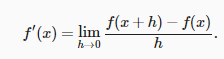
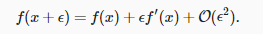
假设在负梯度方向上移动的 ϵ 会减少 f ，选择固定步长 η>0，ϵ=−ηf′(x) ，代入泰勒展开式
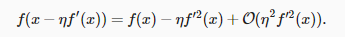
持续展开：
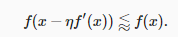
如果我们使用下式来更新x,f(x)可能就会下降:

    * 1.1. 学习率：决定目标函数能否收敛到局部最小值，以及何时收敛到最小值
    * 1.2. 局部最小值
2. 多元梯度下降
梯度也是多元的:
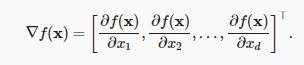
泰勒展开:
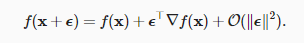
选择合适的学习率:
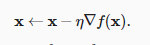
3. 自适应方法
    * 3.1. 牛顿法
    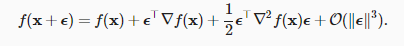
    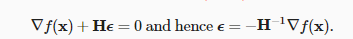
    * 3.2. 收敛性分析：令e(k)=、x(k)−x∗
    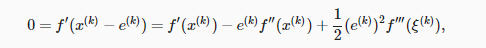
    
    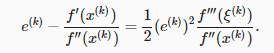
    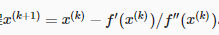
    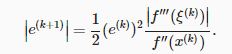
    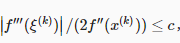
    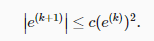
    * 3.3. 预处理
    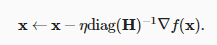
    * 3.4. 梯度下降和线搜索
4. 小结
5. 练习

In [12]:
# 实现梯度下降的具体例子：
%matplotlib inline
import numpy as np
import torch
import dltools

def f(x):  # 目标函数
    return x ** 2

def f_grad(x):  # 目标函数的梯度(导数)
    return 2 * x

In [13]:
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    print(f'epoch 10, x: {x:f}')
    return results

results = gd(1.1, f_grad)

epoch 10, x: 61.917364


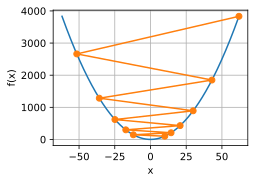

In [14]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    dltools.set_figsize()
    dltools.plot([f_line, results], [[f(x) for x in f_line], [f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o'])

show_trace(results, f)

epoch 10, x: 3.486784


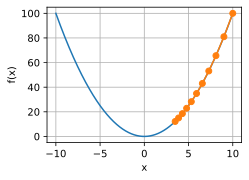

In [4]:
# 学习率设置过低
show_trace(gd(0.05, f_grad), f)

epoch 10, x: 61.917364


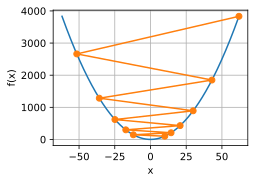

In [5]:
# 学习率设置过大
show_trace(gd(1.1, f_grad), f)

epoch 10, x: 7.603766


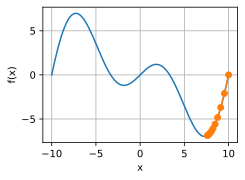

In [17]:
# 局部最小值
c = torch.tensor(0.15 * np.pi)

def f(x):  # 目标函数 f(x) = x * cos(cx)
    return x * torch.cos(c * x)

def f_grad(x):  # 目标函数的梯度
    return torch.cos(c * x) - c * x * torch.sin(c * x)

show_trace(gd(0.1, f_grad), f)

In [22]:
# 多元函数
def train_2d(trainer, steps=50, f_grad=None): 
    """用定制的训练机优化2D目标函数"""
    x1, x2= -5, -2
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2 = trainer(x1, x2, f_grad)
        else:
            x1, x2 = trainer(x1, x2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def show_trace_2d(f, results):
    """显示优化过程中2D变量的轨迹"""
    dltools.set_figsize()
    dltools.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1),torch.arange(-3.0, 1.0, 0.1))
    dltools.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    dltools.plt.xlabel('x1')
    dltools.plt.ylabel('x2')

epoch 50, x1: -0.000071, x2: -0.000000


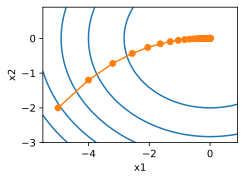

In [23]:
def f_2d(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):  # 目标函数的梯度
    return (2 * x1, 4 * x2)

def gd_2d(x1, x2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2)

eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

epoch 10, x: tensor(0.7655)


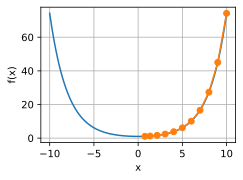

In [26]:
# 牛顿法
c = torch.tensor(0.5)

def f(x):  # O目标函数
    return torch.cosh(c * x)

def f_grad(x):  # 目标函数的梯度
    return c * torch.sinh(c * x)

def f_hess(x):  # 目标函数的Hessian
    return c**2 * torch.cosh(c * x)

def newton(eta=0.5):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x) / f_hess(x)
        results.append(float(x))
    print('epoch 10, x:', x)
    return results

show_trace(newton(), f)

epoch 10, x: tensor(7.2699)


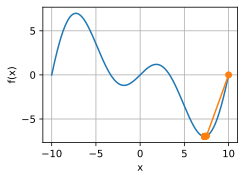

In [27]:
# 非凸函数
c = torch.tensor(0.15 * np.pi)

def f(x):  # 目标函数
    return x * torch.cos(c * x)

def f_grad(x):  # 目标函数的梯度
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):  # 目标函数的Hessian
    return - 2 * c * torch.sin(c * x) - x * c**2 * torch.cos(c * x)

show_trace(newton(), f)

epoch 10, x: tensor(7.2699)


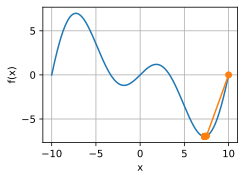

In [27]:
show_trace(newton(0.5), f)